In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz 
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV

# os.environ["PATH"] += os.pathsep + 'C:/Users/Student/Desktop/BDSE22/hands-on_0601/example/release/bin'

In [3]:
# Load data
df = pd.read_csv('./JudgeTest.csv')
df = df.astype(int)
X= df.drop('label', axis = 1)
y=df['label']

In [3]:
type(y)

pandas.core.series.Series

In [4]:
y.shape

(199,)

In [4]:
df

,record,location,compromise,content,education,mindset,financial,support,attitude,confess,sequel,crime,label
0,1,0,0,2,0,0,0,0,0,0,0,0,9
1,0,1,0,0,0,0,0,1,2,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,0,0,7
3,0,0,0,1,1,0,0,0,0,0,1,0,7
4,0,0,0,0,1,0,0,0,1,0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0,0,0,2,1,0,0,1,0,0,1,0,5
195,0,0,0,2,0,0,0,0,0,1,0,1,5
196,0,0,0,0,0,0,1,1,0,0,1,1,5
197,0,1,0,0,0,0,1,0,0,0,0,1,5


In [5]:
# 隨機森林是沒有正規化的準確性比較高
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)

In [6]:
%%time
# 設定要調整的參數
parameters = {'n_estimators':list(range(10,1001,10))}
# 建立空模
model = RandomForestClassifier(max_depth=10)
# 將空模跟參數餵進GridSearchCV
clf = GridSearchCV(model, parameters)
# 餵data
clf.fit(X_train, y_train)
# 印出最佳參數
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)
# 看詳細result
#pd.DataFrame(clf.cv_results_)

RandomForestClassifier(max_depth=10, n_estimators=490)
{'n_estimators': 490}
0.5659274193548387
Wall time: 4min 30s


In [17]:
feature_list = list(X.columns)



# 建模型 設定樹的深度為 6 棵數為 10
rfc = RandomForestClassifier(max_depth=10, n_estimators=490)
rfc.fit(X_train, y_train)


y_pred = rfc.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))


number of correct sample: 22
accuracy: 0.55
con_matrix: [[0 0 0 0 1 0 0 0 1 0]
 [0 3 0 2 0 2 0 0 0 0]
 [0 0 2 0 1 0 0 0 0 0]
 [0 1 0 3 0 0 1 0 0 0]
 [0 0 1 0 1 0 1 0 0 0]
 [2 0 0 0 0 4 0 0 0 0]
 [3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 1 0 0 0 1 2]]


In [17]:
#特徵值得重要性
importances = list(rfc.feature_importances_)

feature_importances = [(feature, round(importance, 2)) 
                       for feature, importance in zip(feature_list, importances)]

#重要性從高到低排序
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: law_i                Importance: 0.21
Variable: education_i          Importance: 0.15
Variable: financial_i          Importance: 0.14
Variable: attitude_i           Importance: 0.11
Variable: compromise_i         Importance: 0.08
Variable: place_i              Importance: 0.06
Variable: confess_i            Importance: 0.06
Variable: sequel_i             Importance: 0.06
Variable: record_i             Importance: 0.05
Variable: support_i            Importance: 0.05
Variable: mind_i               Importance: 0.02


[None, None, None, None, None, None, None, None, None, None, None]

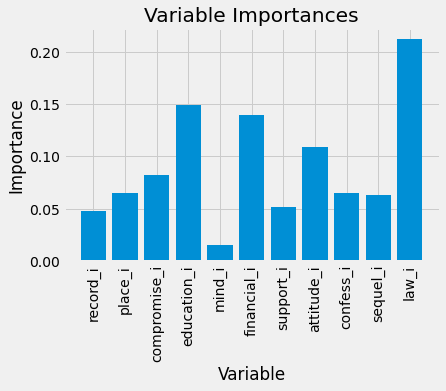

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
# 視覺化特徵值
#設定畫布風格
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))


# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [11]:

for i_tree, tree_in_forest in enumerate(model.estimators_):
    dot_data = tree.export_graphviz(tree_in_forest, out_file = None)
    graph = graphviz.Source(dot_data)
    graph.format = 'png'
    graph.render('./random_forest_plot/tree_' + str(i_tree),view=True) 

NameError: name 'model' is not defined

In [18]:
import pickle

In [26]:
with open("model.pickle","wb") as f:
    pickle.dump(rfc, f, protocol=pickle.HIGHEST_PROTOCOL)

In [27]:
z = np.array([1,0,0,2,1,1,1,1,0,0,1,0])
# 一定要reshape才可以丟模型
z = z.reshape(1, -1)
# 模型建立的時候featrue有正規化，所以後面送的數據也需要正規化

y_test = rfc.predict(z)
print(y_test)

[5]


C:\Users\Student\anaconda3\envs\ML\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
